## Graphdefinition and NodeDefinition test

In [1]:
# import sys
# import os
# sys.path.append(os.getcwd())
from graphnet.datasets import TRIDENTSmall
from TRIDENTGraphDefinition import TRIDENTGraphDefinition
from TRIDENTNodeDefinition import TRIDENTNodeDefinition

graph_definition = TRIDENTGraphDefinition(node_definition=TRIDENTNodeDefinition())

dataset =  TRIDENTSmall(graph_definition = graph_definition,
                    download_dir = './datasets',
                    train_dataloader_kwargs = {
                        'batch_size': 3,
                        'num_workers': 1,
                        },
                    backend = 'sqlite')

graphnet [MainProcess] WARNING  2024-10-28 21:33:28 - <module> - `icecube` not available. Some functionality may be missing.
graphnet [MainProcess] WARNING  2024-10-28 21:33:29 - <module> - `jammy_flows` not available. Normalizing Flow functionality is missing.
graphnet [MainProcess] INFO     2024-10-28 21:33:29 - TRIDENT.__init__ - Writing log to logs/graphnet_20241028-213329.log
graphnet [MainProcess] WARNING  2024-10-28 21:33:29 - TRIDENTGraphDefinition.__call__ - No EdgeDefinition given. Graphs will not have edges!
graphnet [MainProcess] INFO     2024-10-28 21:33:30 - __init__ - No `val_dataloader_kwargs` given. This arg has been set to `train_dataloader_kwargs` with `shuffle` = False.
graphnet [MainProcess] INFO     2024-10-28 21:33:30 - __init__ - No `test_dataloader_kwargs` given. This arg has been set to `train_dataloader_kwargs` with `shuffle` = False.


In [2]:
graph_definition._node_definition

TRIDENTNodeDefinition(
  TRIDENTNodeDefinition(
  {
      'arguments': {
          'output_feature_names': ['nx', 'ny', 'nz', 't1st', 'nhits', 'norm_xyz'],
          'keys': ['sensor_pos_x', 'sensor_pos_y', 'sensor_pos_z', 't'],
          'id_columns': ['sensor_pos_x', 'sensor_pos_y', 'sensor_pos_z'],
          'time_column': 't',
      },
  })
)

In [3]:
train_dataloader = dataset.train_dataloader
val_dataloader = dataset.val_dataloader
test_dataloader = dataset.test_dataloader

In [4]:
batch = next(iter(train_dataloader))
print(batch)
data = batch[0]
# print(batch.sensor_pos_x)
print(batch.x)
print(batch.x.max(dim=0)[0])
print(batch.x.min(dim=0)[0])

graphnet [Process-1] WARNING  2024-10-28 21:33:32 - <module> - `icecube` not available. Some functionality may be missing.
graphnet [Process-1] WARNING  2024-10-28 21:33:33 - <module> - `jammy_flows` not available. Normalizing Flow functionality is missing.
graphnet [Process-1] INFO     2024-10-28 21:33:33 - TRIDENT.__init__ - Writing log to logs/graphnet_20241028-213333.log
Start. x shape: torch.Size([0, 4])
Start. x shape: torch.Size([2, 4])
End. x shape: (2, 6)
Num hits: 2.0
Start. x shape: torch.Size([46, 4])
End. x shape: (9, 6)
Num hits: 46.0
Start. x shape: torch.Size([1, 4])
End. x shape: (1, 6)
Num hits: 1.0
Start. x shape: torch.Size([6, 4])
End. x shape: (5, 6)
Num hits: 6.0
Start. x shape: torch.Size([3, 4])
End. x shape: (3, 6)
Num hits: 3.0
DataBatch(x=[11, 6], n_pulses=[2], dataset_path=[2], event_no=[2], muon=[2], muon_stopped=[2], noise=[2], neutrino=[2], v_e=[2], v_u=[2], v_t=[2], track=[2], dbang=[2], corsika=[2], interaction=[2], initial_state_energy=[2], initial_st

In [5]:
batch[1]["n_pulses"]

tensor([46], dtype=torch.int32)

In [6]:
batch[1].x[:,0:3]

tensor([[-0.8707,  0.2480,  0.4246],
        [-0.8034,  0.2675,  0.5319],
        [-0.3873,  0.6805, -0.6220],
        [-0.0901, -0.9599, -0.2654],
        [-0.0720, -0.7677,  0.6367],
        [ 0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  1.0000],
        [ 0.8733, -0.3821, -0.3021]])

In [7]:
batch[1].x[:,4]
sum(batch[1].x[:,4])

tensor(46.)

Start. x shape: torch.Size([0, 4])
Start. x shape: torch.Size([2, 4])
End. x shape: (2, 6)
Num hits: 2.0
Start. x shape: torch.Size([46, 4])
End. x shape: (9, 6)
Num hits: 46.0
Start. x shape: torch.Size([1, 4])
End. x shape: (1, 6)
Num hits: 1.0
Start. x shape: torch.Size([6, 4])
End. x shape: (5, 6)
Num hits: 6.0
Start. x shape: torch.Size([3, 4])
End. x shape: (3, 6)
Num hits: 3.0
Start. x shape: torch.Size([4, 4])
End. x shape: (4, 6)
Num hits: 4.0
Start. x shape: torch.Size([14, 4])
End. x shape: (4, 6)
Num hits: 14.0
Start. x shape: torch.Size([23, 4])
End. x shape: (6, 6)
Num hits: 23.0
tensor(46.)
46


/var/folders/4j/0dbg6pc97f793yghk9n2n0340000gn/T/ipykernel_49228/2807249913.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


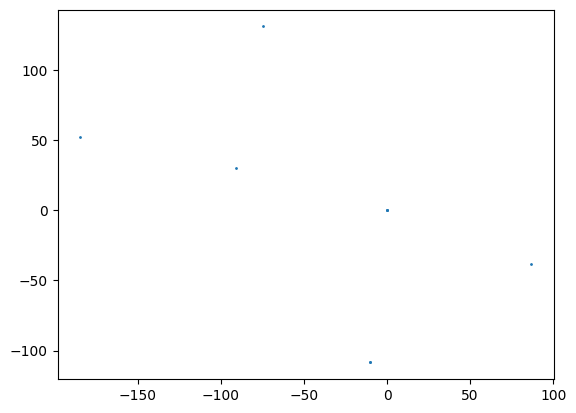

In [8]:
from matplotlib import pyplot as plt 
fig, ax = plt.subplots()
for i, batch in enumerate(train_dataloader):
    ax.scatter((batch[1].x[:,0] * batch[1].x[:,5]).numpy(), (batch[1].x[:,1] * batch[1].x[:,5]).numpy(), s=1)
    print(sum(batch[1].x[:,4]))
    print(sum(batch[1]["n_pulses"].numpy()))
    if i==0:
        break
fig.show()

## Implementation test

In [8]:
from typing import Dict, Any

config: Dict[str, Any] = {
        "path": "./datasets",
        "batch_size": 3,
        "num_workers": 1,
        "target": "direction",
        "early_stopping_patience":5,
        "fit": {
            "gpus": [0],
            "max_epochs": 200,
        },
    }

In [9]:
from TRIDENTGraphDefinition import TRIDENTGraphDefinition
from TRIDENTGraphDefinition import TRIDENT

features = ['sensor_pos_x','sensor_pos_y','sensor_pos_z', "t"]
graph_definition= TRIDENTGraphDefinition(detector = TRIDENT(),
                                input_feature_names=features)

In [10]:
from graphnet.datasets import TRIDENTSmall

data_module = TRIDENTSmall(graph_definition = graph_definition,
                    download_dir = config["path"],
                    train_dataloader_kwargs = {
                        'batch_size': config["batch_size"],
                        'num_workers': config["num_workers"],
                        },
                    backend = 'sqlite')

training_dataloader = data_module.train_dataloader
validation_dataloader = data_module.val_dataloader

graphnet [MainProcess] INFO     2024-10-29 22:01:24 - __init__ - No `val_dataloader_kwargs` given. This arg has been set to `train_dataloader_kwargs` with `shuffle` = False.
graphnet [MainProcess] INFO     2024-10-29 22:01:24 - __init__ - No `test_dataloader_kwargs` given. This arg has been set to `train_dataloader_kwargs` with `shuffle` = False.


In [11]:
from TridentNet import TridentTrackNet, default_net_setting

backbone = TridentTrackNet(settings=default_net_setting,DEVICE="cpu")

In [12]:
batch = next(iter(training_dataloader))
backbone(batch)

graphnet [Process-2] WARNING  2024-10-29 22:01:30 - <module> - `icecube` not available. Some functionality may be missing.
graphnet [Process-2] WARNING  2024-10-29 22:01:32 - <module> - `jammy_flows` not available. Normalizing Flow functionality is missing.
graphnet [Process-2] INFO     2024-10-29 22:01:32 - TRIDENT.__init__ - Writing log to logs/graphnet_20241029-220132.log
Start. x shape: torch.Size([0, 4])
Start. x shape: torch.Size([2, 4])
End. x shape: (2, 6)
Num hits: 2.0
Start. x shape: torch.Size([46, 4])
End. x shape: (9, 6)
Num hits: 46.0
Start. x shape: torch.Size([1, 4])
End. x shape: (1, 6)
Num hits: 1.0
Start. x shape: torch.Size([6, 4])
End. x shape: (5, 6)
Num hits: 6.0
Start. x shape: torch.Size([3, 4])
End. x shape: (3, 6)
Num hits: 3.0
Start. x shape: torch.Size([4, 4])
End. x shape: (4, 6)
Num hits: 4.0
Start. x shape: torch.Size([14, 4])
End. x shape: (4, 6)
Num hits: 14.0


(tensor([[-0.0952,  0.1598,  0.2040],
         [-0.2763,  0.0244, -0.1085],
         [-0.0537,  0.1542, -0.0851],
         [-0.0995,  0.0604,  0.0484],
         [-0.0337,  0.1310, -0.1853],
         [-0.0879,  0.1009, -0.1502],
         [-0.0863,  0.0748, -0.0678],
         [-0.2454,  0.0485, -0.1029],
         [-0.0868, -0.0004,  0.0036],
         [-0.0869,  0.0188, -0.2046],
         [-0.1187,  0.1107, -0.0370]], grad_fn=<AddmmBackward0>),
 tensor([[ 6.6415e-01, -9.1160e-01, -3.6083e-01],
         [-1.2125e-03,  1.6531e-04, -2.8496e-03]], grad_fn=<DivBackward0>))

Start. x shape: torch.Size([23, 4])
End. x shape: (6, 6)
Num hits: 23.0


In [7]:
from MiddleReconModel import MiddleReconModel
model = MiddleReconModel(
        graph_definition=graph_definition,
        backbone=backbone,
        tasks=[task],
        optimizer_class=Adam,
        optimizer_kwargs={"lr": 1e-03},
        scheduler_class=ReduceLROnPlateau,
        scheduler_kwargs={
            "patience": 2,
        },
        scheduler_config={
            "frequency": 1,
            "monitor": "val_loss",
        },
    )

NameError: name 'task' is not defined